Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Tensor("Conv2D:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("Relu:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("MaxPool:0", shape=(?, 14, 14, 32), dtype=float32)
Tensor("Conv2D_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("Relu_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("MaxPool_1:0", shape=(?, 7, 7, 64), dtype=float32)
Learning started.
Epoch: 01 loss =  0.345597459
Epoch: 02 loss =  0.091797432
Epoch: 03 loss =  0.068372396
Epoch: 04 loss =  0.056379004
Epoch: 05 loss =  0.046920019
Epoch: 06 loss =  0.041171568
Epoch: 07 loss =  0.036644606
Epoch: 08 loss =  0.032853815
Epoch: 09 loss =  0.028126524
Epoch: 10 loss =  0.024791351
Epoch: 11 loss =  0.022118081
Epoch: 12 loss =  0.020218051
Epoch: 13 loss =  0.017048809
Epoch: 14 loss =  0.015361157
Epoch: 15 loss =  0.0131

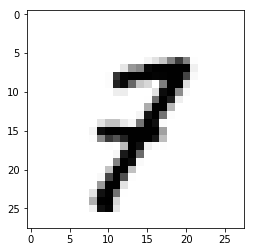

In [1]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
learning_rate = 0.001
training_epochs = 15
batch_size = 100

X = tf.placeholder(tf.float32, [None, 28*28])
X_img = tf.reshape(X, [-1, 28, 28, 1])
Y = tf.placeholder(tf.float32, [None, 10])

W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
L1 = tf.nn.conv2d(X_img, W1, strides=[1,1,1,1], padding='SAME')
L1_relu = tf.nn.relu(L1)
L1_maxpool = tf.nn.max_pool(L1_relu, ksize=[1,2,2,1],
                           strides=[1,2,2,1], padding='SAME')
print(L1)
print(L1_relu)
print(L1_maxpool)

W2 = tf.Variable(tf.random_normal([3,3,32,64], stddev=0.01))
L2 = tf.nn.conv2d(L1_maxpool, W2, strides=[1,1,1,1], padding='SAME')
L2_relu = tf.nn.relu(L2)
L2_maxpool = tf.nn.max_pool(L2_relu, ksize=[1,2,2,1],
                           strides=[1,2,2,1], padding='SAME')
print(L2)
print(L2_relu)
print(L2_maxpool)

L2_flat = tf.reshape(L2_maxpool, [-1, 7*7*64])

W3 = tf.get_variable('W3', shape = [7*7*64, 10],
                    initializer = tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(L2_flat, W3) + b

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
        logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
print('Learning started.')
for epoch in range(training_epochs):
    avg_loss = 0
    total_batch = int(mnist.train.num_examples/batch_size)
    for i in range(total_batch):
        x, y = mnist.train.next_batch(batch_size)
        feed = {X: x, Y:y}
        _, l = sess.run([optimizer, loss], feed)
        avg_loss += l/total_batch
    print('Epoch:', '%02d'%(epoch+1), 'loss = ', '{:.9f}'.format(avg_loss))
print('Learning ended.')

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, {X:mnist.test.images, Y:mnist.test.labels}))

r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
print("Prediction: ", sess.run(tf.argmax(logits, 1), {X:mnist.test.images[r:r+1]}))
plt.imshow(mnist.test.images[r:r+1].reshape(28, 28),
          cmap = 'Greys', interpolation = 'nearest')
plt.show()